# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
raw_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in raw_cities:
        raw_cities.append(city)

# Print the city count to confirm sufficient count
len(raw_cities)

564

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initialize the List attributes.
cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# Initialize counters for print log
set_counter = 0;
record_counter = 0;

# Set the units to "imperial" to retrieve temperature in "Fahrenheit" and speed in Mph; units = "metric" would retrieve temperature in "Celsius" meter/sec
units = "imperial"

# Loggers followed by successive API calls for all the cities in the list.
print('Beginning Data Retrieval')
print('-----------------------------')

# raw_cities = ['houston', 'Los Angeles', 'Sushma', 'New York']
for i, city in enumerate(raw_cities):
    
    # set/reset the logger counters 
    if(i % 50 == 0):
        set_counter += 1
        record_counter = 1
        
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    
    # API calls 
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)

#       append the list elements only for valid cities
        if response.status_code == 200:
            weatherData = response.json()

            cities.append(weatherData['name'])
            lats.append(weatherData['coord']['lat'])
            lngs.append(weatherData['coord']['lon'])
            max_temps.append(weatherData['main']['temp_max'])
            humidities.append(weatherData['main']['humidity'])
            cloudinesses.append(weatherData['clouds']['all'])
            wind_speeds.append(weatherData['wind']['speed'])
            countries.append(weatherData['sys']['country'])
            dates.append(weatherData['dt'])
        else:
            print(f"City {city} not found. Skipping...")

    except e:
        print(f"City {city} not found. Skipping... {e}")
    
    record_counter += 1

#  API Call end logger    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
processing Record 1 of Set 1 | dunedin
processing Record 2 of Set 1 | qaanaaq
processing Record 3 of Set 1 | kapaa
processing Record 4 of Set 1 | bredasdorp
processing Record 5 of Set 1 | rikitea
processing Record 6 of Set 1 | mataura
processing Record 7 of Set 1 | coquimbo
processing Record 8 of Set 1 | caravelas
processing Record 9 of Set 1 | bourail
processing Record 10 of Set 1 | vaini
processing Record 11 of Set 1 | san jose
processing Record 12 of Set 1 | hobart
processing Record 13 of Set 1 | severo-kurilsk
processing Record 14 of Set 1 | illoqqortoormiut
City illoqqortoormiut not found. Skipping...
processing Record 15 of Set 1 | georgetown
processing Record 16 of Set 1 | vestmannaeyjar
processing Record 17 of Set 1 | ponta do sol
processing Record 18 of Set 1 | broome
processing Record 19 of Set 1 | vestmanna
processing Record 20 of Set 1 | trairi
processing Record 21 of Set 1 | ushuaia
processing Record 22 of Set 1 | karr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert Raw Data into DataFrame

cityWeatherDF = pd.DataFrame({
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
})

In [5]:
#  Display the DataFrame

cityWeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dunedin,-45.8742,170.5036,59.29,82,100,2.66,NZ,1640940242
1,Qaanaaq,77.4840,-69.3632,-10.35,69,97,7.40,GL,1640940243
2,Kapaa,22.0752,-159.3190,73.72,86,90,1.99,US,1640940243
3,Bredasdorp,-34.5322,20.0403,77.29,49,0,14.97,ZA,1640940244
4,Rikitea,-23.1203,-134.9692,77.36,75,94,11.88,PF,1640940245


In [6]:
# Validate the record counts and all the columns have the same number of records.

cityWeatherDF.count()

City          517
Lat           517
Lng           517
Max Temp      517
Humidity      517
Cloudiness    517
Wind Speed    517
Country       517
Date          517
dtype: int64

In [7]:
# There are more than 500 Unique Cities taken for the analysis

cityWeatherDF.nunique()

City          517
Lat           517
Lng           517
Max Temp      493
Humidity       87
Cloudiness     86
Wind Speed    312
Country       116
Date          328
dtype: int64

In [8]:
# Export Data into .csv file
cityWeatherDF.to_csv("../output_data/city_weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Inspect the data to identify the cities with humidity > 100%

cityWeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,19.590321,19.806434,50.839497,72.235977,63.400387,7.885048,1.640940e+09
std,33.721527,89.283326,32.276521,22.210550,38.664481,5.836403,1.074030e+02
min,-54.800000,-175.200000,-54.900000,8.000000,0.000000,0.000000,1.640940e+09
25%,-9.012200,-58.650200,31.170000,58.000000,23.000000,3.150000,1.640940e+09
50%,24.144700,25.570100,62.200000,77.000000,79.000000,6.670000,1.640940e+09
75%,47.866700,100.408800,77.040000,91.000000,100.000000,11.140000,1.640940e+09
max,78.218600,179.316700,100.170000,100.000000,100.000000,29.930000,1.640941e+09


#### By looking at the minimum and maximum value of Humidity, we can see the no cities have humidity greater than 100%. So no rows displayed after below filter selection too.

In [10]:
#  Get the indices of cities that have humidity over 100%.
cityWeatherDF.loc[cityWeatherDF['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityWeatherDF = cityWeatherDF.loc[cityWeatherDF['Humidity'] <= 100]
cleanCityWeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dunedin,-45.8742,170.5036,59.29,82,100,2.66,NZ,1640940242
1,Qaanaaq,77.4840,-69.3632,-10.35,69,97,7.40,GL,1640940243
2,Kapaa,22.0752,-159.3190,73.72,86,90,1.99,US,1640940243
3,Bredasdorp,-34.5322,20.0403,77.29,49,0,14.97,ZA,1640940244
4,Rikitea,-23.1203,-134.9692,77.36,75,94,11.88,PF,1640940245


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

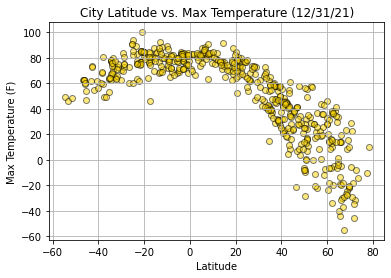

In [29]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Max Temp']

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

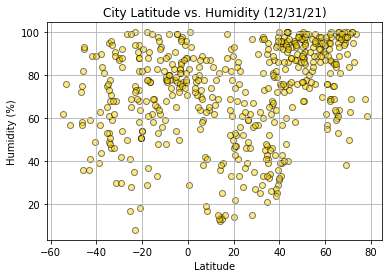

In [14]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Humidity']

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

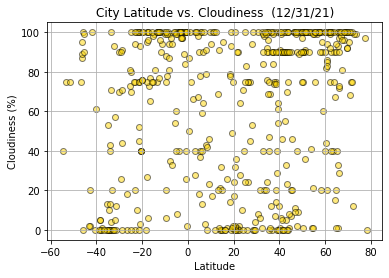

In [15]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Cloudiness']

plt.title(f'City Latitude vs. Cloudiness  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

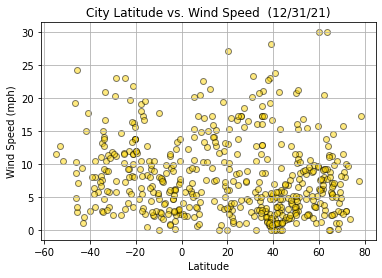

In [16]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Wind Speed']

plt.title(f'City Latitude vs. Wind Speed  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coords,fontsize=15,color="red")
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(plot_location)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude greater than 0 are considered to be part of Northern Hemisphere,
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

northernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] >= 0)]
northernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Qaanaaq,77.4840,-69.3632,-10.35,69,97,7.40,GL,1640940243
2,Kapaa,22.0752,-159.3190,73.72,86,90,1.99,US,1640940243
10,San Jose,37.3394,-121.8950,48.07,81,90,1.99,US,1640940062
12,Severo-Kuril'sk,50.6789,156.1250,31.96,96,100,15.32,RU,1640940249
13,George Town,5.4112,100.3354,87.75,64,40,1.99,MY,1640940250


In [19]:
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

southernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] < 0)]
southernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dunedin,-45.8742,170.5036,59.29,82,100,2.66,NZ,1640940242
3,Bredasdorp,-34.5322,20.0403,77.29,49,0,14.97,ZA,1640940244
4,Rikitea,-23.1203,-134.9692,77.36,75,94,11.88,PF,1640940245
5,Mataura,-46.1927,168.8643,62.47,58,87,8.61,NZ,1640940245
6,Coquimbo,-29.9533,-71.3436,62.33,88,90,2.30,CL,1640940246


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7423965664140655


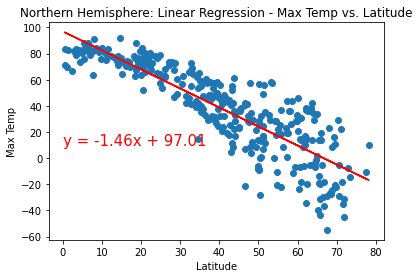

In [20]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']

plot_title = "Northern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (0,10)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3038329453775623


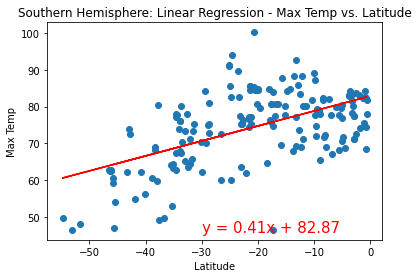

In [21]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

plot_title = "Southern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (-30,46)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18014684100387154


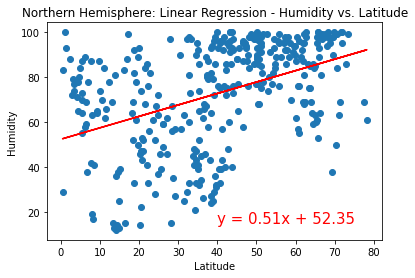

In [22]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Humidity']

plot_title = "Northern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07719873582525764


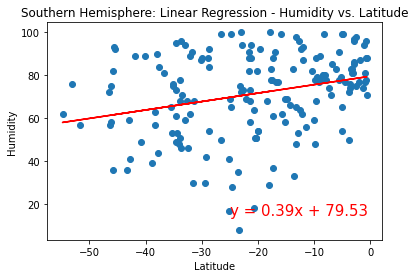

In [23]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Humidity']

plot_title = "Southern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (-25,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08744262691363147


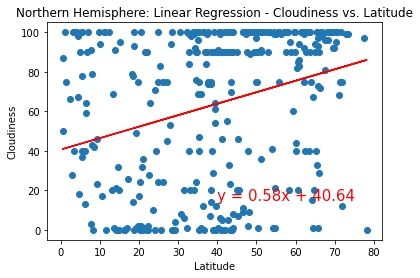

In [24]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Cloudiness']

plot_title = "Northern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20539409495533614


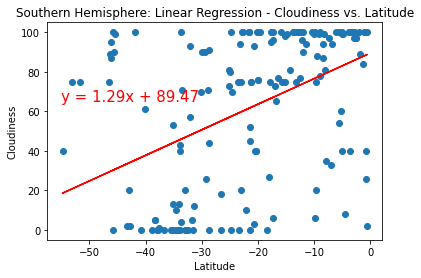

In [25]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Cloudiness']

plot_title = "Southern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (-55,65)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013881980982296592


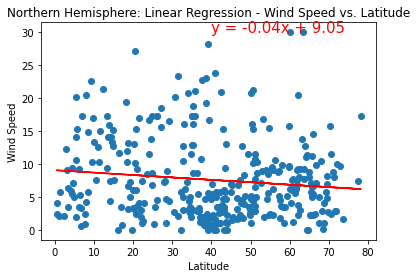

In [26]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Wind Speed']

plot_title = "Northern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (40,30)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06714790837637231


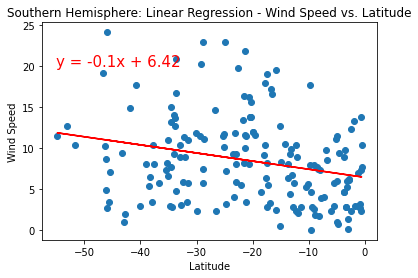

In [27]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Wind Speed']

plot_title = "Southern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (-55,20)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)